In [1]:
import lts.initialize as initialize
import lts.evolve as evolve
import numpy as np
import pylab as pl
import params
% matplotlib inline

pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['figure.dpi']      = 300
pl.rcParams['image.cmap']      = 'jet'
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in' 

In [2]:
config = initialize.set(params)

In [3]:
delta_f_hat_initial = initialize.init_delta_f_hat(config)
time_array          = initialize.time_array(config)

In [4]:
delta_f_hat = evolve.time_integration(config, delta_f_hat_initial, time_array)

In [5]:
k_x = config.k_x
k_y = config.k_y
x   = config.x
y   = config.y

delta_rho_max   = np.zeros(delta_f_hat.shape[0])
delta_E_sqr_max = np.zeros(delta_f_hat.shape[0])
sigma_x_max     = np.zeros(delta_f_hat.shape[0])
sigma_x_min     = np.zeros(delta_f_hat.shape[0])
sigma_y_max     = np.zeros(delta_f_hat.shape[0])
sigma_y_min     = np.zeros(delta_f_hat.shape[0])


delta_rho       = np.zeros([time_array.size, config.N_y, config.N_x])
delta_E_x       = np.zeros([time_array.size, config.N_y, config.N_x])
delta_E_y       = np.zeros([time_array.size, config.N_y, config.N_x])
delta_J_x       = np.zeros([time_array.size, config.N_y, config.N_x])
delta_J_y       = np.zeros([time_array.size, config.N_y, config.N_x])
sigma_x         = np.zeros([time_array.size, config.N_y, config.N_x])
sigma_y         = np.zeros([time_array.size, config.N_y, config.N_x])

delta_J_x_hat   = np.zeros([time_array.size])
delta_J_y_hat   = np.zeros([time_array.size])

for time_index in range(delta_f_hat.shape[0]):
    delta_rho_tmp                = evolve.compute_delta_rho(delta_f_hat[time_index, :, :, :], config)
    delta_E_x_tmp, delta_E_y_tmp = evolve.compute_delta_E(delta_f_hat[time_index, :, :, :], config)
    delta_J_x_tmp, delta_J_y_tmp = evolve.compute_delta_J(delta_f_hat[time_index, :, :, :], config)
    delta_J_x_hat, delta_J_y_hat = evolve.compute_delta_J_hat(delta_f_hat[time_index, :, :, :], config)

    
    delta_rho[time_index, :, :] = delta_rho_tmp
    delta_E_x[time_index, :, :] = delta_E_x_tmp
    delta_E_y[time_index, :, :] = delta_E_y_tmp
    delta_J_x[time_index, :, :] = delta_J_x_tmp
    delta_J_y[time_index, :, :] = delta_J_y_tmp
    
    #sigma_x[time_index, :, :]   = delta_J_x_tmp/delta_E_x_tmp
    #sigma_y[time_index, :, :]   = delta_J_y_tmp/delta_E_y_tmp
    sigma_x[time_index, :, :]   = delta_J_x_hat/config.delta_E_x_hat_ext
    sigma_y[time_index, :, :]   = delta_J_y_hat/config.delta_E_y_hat_ext

    
    sigma_x_max[time_index]     = np.max(sigma_x[time_index, :, :])
    sigma_x_min[time_index]     = np.min(sigma_x[time_index, :, :])
    sigma_y_max[time_index]     = np.max(sigma_y[time_index, :, :])
    sigma_y_min[time_index]     = np.min(sigma_y[time_index, :, :])
    
    delta_rho_max[time_index]   = np.max(delta_rho_tmp)
    delta_E_sqr_max[time_index] = np.max(delta_E_x_tmp**2. + delta_E_y_tmp**2.)

/home/mani/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mani/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in cdouble_scalars
/home/mani/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/home/mani/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in cdouble_scalars


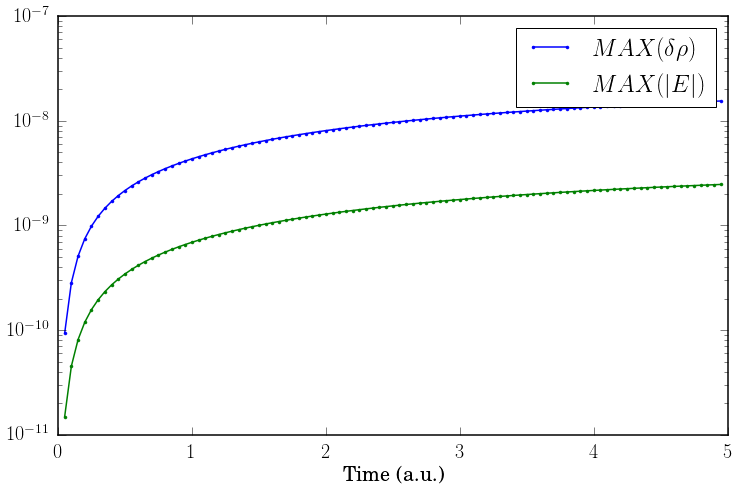

In [6]:
pl.semilogy(time_array, delta_rho_max, '.-')
pl.semilogy(time_array, np.sqrt(delta_E_sqr_max), '.-')
pl.xlabel('Time (a.u.)')
pl.legend([r'$MAX(\delta \rho)$', r'$MAX(|E|)$'])
#pl.savefig('/tmp/collisionless_electric_field_decay.png')
#pl.ylabel(r'$MAX(\delta \rho(x, y))$')

In [ ]:
pl.semilogy(time_array[:-3], np.abs(sigma_y_max[:-3] - np.mean(sigma_y_max[500:-3])), '.-')
#pl.semilogy(time_array, np.abs(sigma_x_min))
#pl.xlabel(r'Time')
#pl.ylabel(r'$\sigma_{yy}$')
#pl.savefig('/tmp/sigma_yy_tau_D_0.01.png')

sigma_y_max[-3]

#pl.plot(time_array, sigma_x_max)
#pl.plot(time_array, sigma_x_min)
#pl.plot(time_array, sigma_y_max)
#pl.plot(time_array, sigma_y_min)

In [ ]:
np.mean(sigma_y_max[500:-3])

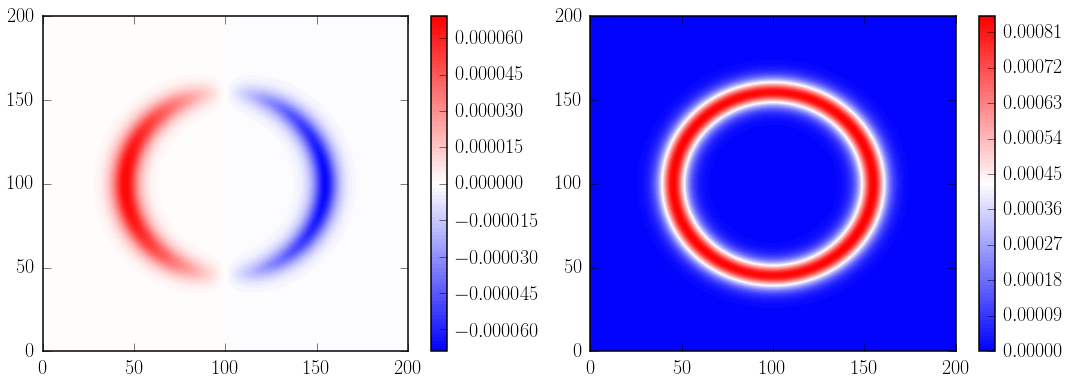

In [7]:
#delta_J_x_hat, delta_J_y_hat = evolve.compute_delta_J_hat(delta_f_hat[-2, :, :, :], config)

pl.figure(figsize=(18, 6))
pl.subplot(121)
pl.contourf(delta_f_hat[-2, 0, :, :].real, 100, cmap='bwr')
pl.colorbar()

pl.subplot(122)
pl.contourf(delta_f_hat[-2, 0, :, :].imag, 100, cmap='bwr')
pl.colorbar()


In [ ]:
config.chemical_potential_background

In [ ]:
upper_band_vel, lower_band_vel = config.band_velocities
vel_x, vel_y = upper_band_vel

dfdv_y_background, dfdv_x_background = initialize.dfdp_background(config)

g_perturation = - config.tau_defect * config.delta_E_y_hat_ext * dfdv_y_background[0, :, :] \
                / (1. + 1j*config.tau_defect*(config.k_x*vel_x + config.k_y*vel_y))

sigma_drude = 4./ (2.*np.pi)**2. * np.sum(g_perturation * vel_y) * config.dp_x * config.dp_y \
               / config.delta_E_y_hat_ext
sigma_drude

In [ ]:
upper_band_vel, lower_band_vel = config.band_velocities
vel_x, vel_y = upper_band_vel

dfdv_y_background, dfdv_x_background = initialize.dfdp_background(config)

g_perturation = - config.delta_E_y_hat_ext * dfdv_y_background[0, :, :]

sigma_drude = 4./ (2.*np.pi)**2. * np.sum(g_perturation * vel_y) * config.dp_x * config.dp_y \
               / config.delta_E_y_hat_ext
sigma_drude

In [ ]:
v_F  = config.fermi_velocity
mu_0 = config.chemical_potential_background
T_0  = config.temperature_background
k    = config.boltzmann_constant
k_x  = config.k_x

p_magnitude = np.arange(0, .1, 0.00001)

tmp_plus  = np.exp((v_F * p_magnitude - mu_0)/(k*T_0))
tmp_minus = np.exp(-(v_F * p_magnitude - mu_0)/(k*T_0))

integrand = p_magnitude / ((tmp_plus + 1.) * (tmp_minus + 1.))

dp_magnitude = p_magnitude[1] - p_magnitude[0]

sigma_drude = np.pi * v_F**2./(k*T_0) * np.sum(integrand) * dp_magnitude * 4./ (2.*np.pi)**2.
pl.plot(p_magnitude, integrand)
sigma_drude

In [ ]:
integrand

In [ ]:
upper_band_vel, lower_band_vel = config.band_velocities
vel_x, vel_y = upper_band_vel

dfdv_y_background, dfdv_x_background = initialize.dfdp_background(config)

tau_eff   = (config.tau_ee * config.tau_defect) / (config.tau_ee + config.tau_defect)
g_pert_0 = - tau_eff * config.charge_particle * config.delta_E_y_hat_ext * dfdv_y_background[0, :, :]

E_upper = config.band_energies[0]
mu_0    = config.chemical_potential_background
T_0     = config.temperature_background
k       = config.boltzmann_constant

tmp = (E_upper - mu_0)/(k*T_0)

A = 1./(k*T_0) * (1./ (np.exp(tmp) + 2. + np.exp(-tmp)))

delta_vy_hat_eqbm = np.sum(g_pert_0 * config.p_y) / np.sum(A * config.p_y**2.)

g_pert_1 = A * delta_vy_hat_eqbm * config.p_y * tau_eff/config.tau_ee
    
g_perturation = g_pert_0 + g_pert_1

sigma_ee = 4./ (2.*np.pi)**2. * np.sum(g_perturation * vel_y) * config.dp_x * config.dp_y \
             / config.delta_E_y_hat_ext
sigma_ee

In [ ]:
g_pert_collisionless = 1j * config.delta_E_y_hat_ext * dfdv_y_background[0, :, :] \
                       / ((config.k_x*vel_x + config.k_y*vel_y) + 1e-30)

sigma_collisionless = 4./ (2.*np.pi)**2. * np.sum(g_pert_collisionless * vel_y) * config.dp_x * config.dp_y \
                      / config.delta_E_y_hat_ext

sigma_collisionless 

In [ ]:
v_F  = config.fermi_velocity
mu_0 = config.chemical_potential_background
T_0  = config.temperature_background
k    = config.boltzmann_constant
k_x  = config.k_x
q    = config.charge_particle

theta_integral = -2.*np.pi * 1j

p_magnitude = np.arange(0, .1, 0.00001)

tmp_plus  = np.exp((v_F * p_magnitude - mu_0)/(k*T_0))
tmp_minus = np.exp(-(v_F * p_magnitude - mu_0)/(k*T_0))

p_integrand = p_magnitude / ((tmp_plus + 1.) * (tmp_minus + 1.))

dp_magnitude = p_magnitude[1] - p_magnitude[0]

p_integral = np.sum(p_integrand) * dp_magnitude

sigma_collisionless = 1j * (q * v_F/(k*T_0*k_x)) * theta_integral * p_integral * 4./ (2.*np.pi)**2.
sigma_collisionless

In [ ]:
pl.contourf(g_pert_collisionless.imag, 100)

In [ ]:
#densities = np.array([1.95884201e-06,   6.55659536e-06,   1.41889733e-05,
#                      2.48733826e-05,   3.86104480e-05,   5.54001306e-05,
#                      7.52407164e-05,   9.80845181e-05])

densities =   np.array([  1.95884201e-06,   3.88250193e-06,   6.55659536e-06,
                          9.99142907e-06,   1.41889733e-05,   1.91496010e-05,
                          2.48733826e-05,   3.13603312e-05,   3.86104480e-05,
                          4.66237265e-05,   5.54001306e-05,   6.49394673e-05,
                          7.52407164e-05,   8.62984861e-05,   9.80845181e-05])

sigmas    = np.array([3.2439558158294355e-06, 4.7836082713162324e-06, 6.3654302808090933e-06, \
                      7.9551489493769998e-06, 9.5462666217634345e-06, 1.1137595700810652e-05, \
                      1.2728932273176742e-05, 1.4320248145461919e-05, 1.5911540656169923e-05, \
                      1.7502793161207763e-05, 1.9093898204576791e-05, 2.0684270880793796e-05, \
                      2.2270804610843415e-05, 2.3837091454561134e-05, 2.529758735659004e-05])

sigmas_ee = np.array([1.8645862041521894e-06, 2.5977371135067074e-06, 3.3625576735139392e-06, \
                      4.1347931897889938e-06, 4.9113330595807559e-06, 5.6913591894203811e-06, \
                      6.4742133908575491e-06, 7.2593075192939788e-06, 8.046157990615159e-06, \
                      8.8343765166002012e-06, 9.623608323164434e-06, 1.0413296352418378e-05, \
                      1.1201577411920167e-05, 1.1979720419757229e-05, 1.2703956986744065e-05])

pl.plot(densities, sigmas, 'o')
pl.plot(densities, config.tau_defect * config.fermi_velocity * (np.pi * densities)**0.5 / np.pi, \
        )

pl.plot(densities, sigmas_ee, 'o')
pl.plot(densities, popt[0]*densities**popt[1], color='black')
pl.legend([r'$\sigma_D$', r'$\sigma_D = \frac{\tau_D v_F \sqrt{n}}{\sqrt{\pi}}$', \
           r'$\sigma_ee$', r'Curve fit $\sim \sqrt{n}$'], loc='upper left')
pl.xlabel(r'$n$ (in a.u.)')
pl.savefig('/tmp/sigma_defect_vs_ee.png')

In [ ]:
from scipy.optimize import curve_fit

def linear_fit(n, a, b, c):
    sigma = a*n**b + c
    return sigma

popt, pcov = curve_fit(linear_fit, densities, sigmas_ee)
print "popt = ", popt
print "pcov = ", pcov

In [ ]:
def heaviside_theta(x):
    if (x<=0):
        return 0.
    else:
        return 1.

heaviside_theta = np.vectorize(heaviside_theta)

def compute_density(f, E):
    density = 0
    for band in range(f.shape[0]):
        density += 4./(2. * np.pi)**2. * np.sum(f[band, :, :] - heaviside_theta(-E[band])) \
                  * config.dp_x * config.dp_y

    return(density)

def compute_temperature(f, E):
    # WRONG WRONG WRONG : NOT WORKING
    temperature = 0
    for band in range(f.shape[0]):
        temperature += 4./(2. * np.pi)**2. * np.sum(E[band] * f[band, :, :] - 0.*heaviside_theta(-E[band])) \
                      * config.dp_x * config.dp_y

    return(temperature/compute_density(f, E))


n_background = compute_density(initialize.f_background(config), config.band_energies)
sigma_drude = config.tau_defect * config.fermi_velocity * np.sqrt(np.pi*n_background)/np.pi

In [ ]:
sigma_drude

In [ ]:
compute_temperature(initialize.f_background(config), config.band_energies)

In [ ]:
tau_defect_array = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
sigma_array      = np.array([0.20587981417902299, 0.41304081020564293, 0.62281822062361647, 0.83666152113145276, \
                             1.056208295403152, 1.283382639199949, 1.5205358465672192, 1.7706612887893161, \
                             2.0377445899218865, 2.3273716897579626
                            ])
pl.plot(tau_defect_array, sigma_array, 'o-')

In [ ]:
from scipy.optimize import curve_fit

def linear_fit(tau, a, b):
    return a*tau + b

popt, pcov = curve_fit(linear_fit, tau_defect_array, sigma_array)
print "popt = ", popt
print "pcov = ", pcov

In [ ]:
#delta_rho_max_no_fields = delta_rho_max.copy()
#np.savetxt('/tmp/delta_rho_max_no_fields.txt', delta_rho_max_no_fields)

delta_rho_max_with_fields = delta_rho_max.copy()
np.savetxt('/tmp/delta_rho_max_with_fields.txt', delta_rho_max_with_fields)

In [ ]:
delta_rho_max_no_fields   = np.loadtxt('/tmp/delta_rho_max_no_fields.txt')
delta_rho_max_with_fields = np.loadtxt('/tmp/delta_rho_max_with_fields.txt')

pl.semilogy(time_array, delta_rho_max_no_fields, '.-')
pl.semilogy(time_array, delta_rho_max_with_fields, '.-')

pl.xlabel('Time (a.u.)')
pl.ylabel(r'$MAX(\delta \rho(x, y))$')

In [ ]:
def mu_initial(x, y):
    
    delta_mu_hat = config.pert_real + 1j*config.pert_imag
    mu_0         = config.chemical_potential_background
    
    delta_mu = delta_mu_hat.real * np.cos(k_x*x + k_y*y) - \
               delta_mu_hat.imag * np.sin(k_x*x + k_y*y)
        
    return mu_0 + delta_mu

def f_initial(x, y):
    
    E    = config.band_energies
    k    = config.boltzmann_constant
    T    = config.temperature_background
    mu_0 = config.chemical_potential_background

    tmp = (E - mu_0)/(k*T)

    delta_mu_hat = config.pert_real + 1j*config.pert_imag
    
    delta_mu = delta_mu_hat.real * np.cos(k_x*x + k_y*y) - \
               delta_mu_hat.imag * np.sin(k_x*x + k_y*y)

    delta_f = \
        delta_mu * np.exp(tmp) \
      / (k*T * (np.exp(2.*tmp) + 2.*np.exp(tmp) + 1) )
    
    f0 = 1./(np.exp(tmp) + 1)
        
    #delta_f = delta_f_hat_initial[0].real * np.cos(k_x*x + k_y*y) - \
    #          delta_f_hat_initial[0].imag * np.sin(k_x*x + k_y*y)
    
    #return delta_f
    return 1./(np.exp((E - mu_initial(x, y))/(k*T)) + 1)

def f(x, y, t):
    v_x_upper, v_y_upper = config.band_velocities[0]
    v_x_lower, v_y_lower = config.band_velocities[1]
    
    v_x = np.array([v_x_upper, v_x_lower])
    v_y = np.array([v_y_upper, v_y_lower])

    return f_initial(x - v_x*t, y-v_y*t)

def density(x, y, t):
    
    return np.sum(f(x, y, t)) * config.dv_x * config.dv_y

In [ ]:
density_array     = np.zeros([delta_f_hat.shape[0], x.shape[0], x.shape[1]])
density_array_max = np.zeros(delta_f_hat.shape[0])

for time_index in range(delta_f_hat.shape[0]):
    print "time_index = ", time_index, " of ", delta_f_hat.shape[0]
    for j in range(x.shape[0]):
        for i in range(x.shape[1]):
            density_array[time_index, j, i] = density(x[0][i], y[j][0], time_array[time_index])
    
    density_array_max[time_index]   = np.max(density_array[time_index, :, :])


In [ ]:
pl.contourf(x, y, density_array[0, :, :] - np.mean(density_array[0, :, :]), 100)
pl.colorbar()

In [ ]:
pl.plot(time_array[:-1], delta_rho_max[:-1], color='red')
pl.plot(time_array, density_array_max - np.mean(density_array[0, :, :]), color='black', linestyle='--')
pl.legend([r'Linear theory', r'Analytic advection'])
pl.xlabel('Time (a.u.)')
pl.ylabel(r'$MAX(\delta \rho(x, y))$')
pl.title(r'$\mu_0 = 0.01$')
#pl.savefig('/tmp/linear_theory_vs_analytic_advection_mu0_minus_0.01.png')

In [ ]:
np.max(density_array[0, :, :] - 0.*np.mean(density_array[0, :, :]) )

In [ ]:
config.pert_real

In [ ]:
np.min(density_array[0, :, :])

In [ ]:
np.max(density_array[0, :, :])

In [ ]:
np.mean(density_array[0, :, :])